# **Projet QoE – Séance 1 : Data Exploration**
prédire la Qualité d’Expérience (QoE) vidéo à partir de mesures de trafic réseau chiffré, sans inspecter le contenu de la vidéo.

L'objectif de ce projet est de développer des modèles de Machine Learning capables de prédire des indicateurs de Qualité d’Expérience (QoE) tels que le ITU MOS, le startup delay, ou encore la résolution vidéo, en se basant uniquement sur les caractéristiques réseau extraites de trafic chiffré, dans un contexte de streaming vidéo (ex. YouTube).

In [7]:
import pandas as pd

# Charger les noms de colonnes
with open("column-names.txt", "r") as f:
    column_names = [line.split('|')[1].strip() for line in f.readlines() if '|' in line]

# Charger le dataset avec les colonnes
df = pd.read_csv("dataset.csv", header=None, names=column_names)

# Afficher les premières lignes
df.head()


,Field,videoID,category,bitrates_144p,bitrates_240p,bitrates_360p,bitrates_480p,bitrates_720p,bitrates_1080p,join_time,...,QoE_JT,QoE_noStall,QoE_noSwitches,QoE_Linear,QoE_Linear2,QoE_Linear3,QoE_LD_SD_HD,QoE_ITU_023,QoE_ITU_035,QoE_ITU_046
0,NeZ8BQBl8NA,Film & Animation,67101,63551,123054,205503,422644,824186,3411,0,...,0,0,5.0,5.0,5.0,2,5.0,4.44397,4.42413,NaN
1,FWpRqKpV0rY,Education,76305,111936,204952,340239,744420,1683577,2883,0,...,0,0,5.0,5.0,5.0,2,5.0,4.61882,4.58419,NaN
2,n72yt5hc3-A,Travel & Events,91757,123729,195255,303189,682584,1385367,4803,0,...,0,0,5.0,5.0,5.0,2,5.0,4.58990,4.55993,NaN
3,v0_uAqzWlUM,Sports,91222,162811,305089,531184,1191866,2349128,310000,0,...,0,0,0.0,0.0,0.0,0,5.0,4.68886,4.63004,NaN
4,aD3Ahnee0Ck,Film & Animation,104747,223032,411669,682377,1345939,2442657,310000,0,...,0,0,0.0,0.0,0.0,0,-1.0,-1.00000,-1.00000,NaN


***Chargement des données***

In [8]:
import pandas as pd
import io

# Lire les noms de colonnes depuis le fichier .txt
with open("column-names.txt", "r", encoding="utf-8") as f:
    column_lines = f.readlines()

# Extraction propre des noms de colonnes depuis le format SQL
column_names = [line.split('|')[1].strip() for line in column_lines if '|' in line and 'Field' not in line and '---' not in line]

# Charger le dataset avec les noms de colonnes
df = pd.read_csv("dataset.csv", header=None, names=column_names)

print("Données chargées avec succès")
df.head()


Données chargées avec succès


,videoID,category,bitrates_144p,bitrates_240p,bitrates_360p,bitrates_480p,bitrates_720p,bitrates_1080p,join_time,stallingNumber,...,QoE_JT,QoE_noStall,QoE_noSwitches,QoE_Linear,QoE_Linear2,QoE_Linear3,QoE_LD_SD_HD,QoE_ITU_023,QoE_ITU_035,QoE_ITU_046
0,NeZ8BQBl8NA,Film & Animation,67101,63551,123054,205503,422644,824186,3411,0,...,1,0,0,5.0,5.0,5.0,2,5.0,4.44397,4.42413
1,FWpRqKpV0rY,Education,76305,111936,204952,340239,744420,1683577,2883,0,...,1,0,0,5.0,5.0,5.0,2,5.0,4.61882,4.58419
2,n72yt5hc3-A,Travel & Events,91757,123729,195255,303189,682584,1385367,4803,0,...,1,0,0,5.0,5.0,5.0,2,5.0,4.58990,4.55993
3,v0_uAqzWlUM,Sports,91222,162811,305089,531184,1191866,2349128,310000,0,...,0,0,0,0.0,0.0,0.0,0,5.0,4.68886,4.63004
4,aD3Ahnee0Ck,Film & Animation,104747,223032,411669,682377,1345939,2442657,310000,0,...,0,0,0,0.0,0.0,0.0,0,-1.0,-1.00000,-1.00000


***Exploration initiale***

In [9]:
# Taille du jeu de données
print(f"Nombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")

# Vérifier les types de données
df.info()

# Quelques statistiques descriptives
df.describe().T


Nombre de lignes : 111919
Nombre de colonnes : 270
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111919 entries, 0 to 111918
Columns: 270 entries, videoID to QoE_ITU_046
dtypes: float64(98), int64(170), object(2)
memory usage: 230.5+ MB


,count,mean,std,min,25%,50%,75%,max
bitrates_144p,111919.0,8.433258e+04,20668.859700,0.0,80330.500000,9.181100e+04,9.694900e+04,2.248400e+05
bitrates_240p,111919.0,1.614884e+05,56534.866093,0.0,123167.500000,1.734400e+05,2.089205e+05,9.127370e+05
bitrates_360p,111919.0,2.969415e+05,105257.645127,0.0,226045.500000,3.190800e+05,3.848440e+05,1.737032e+06
bitrates_480p,111919.0,5.182005e+05,198978.759166,0.0,374536.000000,5.480470e+05,6.891835e+05,2.469066e+06
bitrates_720p,111919.0,1.042117e+06,403614.412299,0.0,755894.000000,1.104771e+06,1.388100e+06,6.597562e+06
...,...,...,...,...,...,...,...,...
QoE_Linear3,111919.0,3.421945e+00,1.536845,0.0,2.354365,3.929890e+00,4.784930e+00,5.000000e+00
QoE_LD_SD_HD,111919.0,1.118353e+00,0.848809,0.0,0.000000,1.000000e+00,2.000000e+00,2.000000e+00
QoE_ITU_023,111919.0,4.701973e+00,1.103947,-1.0,5.000000,5.000000e+00,5.000000e+00,5.000000e+00
QoE_ITU_035,111919.0,3.508724e+00,1.218091,-1.0,2.888710,3.816160e+00,4.440985e+00,5.000000e+00


Analyse des valeurs manquantes

In [10]:
missing = df.isna().sum()
missing[missing > 0].sort_values(ascending=False)


category    3
dtype: int64

***Histogramme : QoE (ITU MOS)***

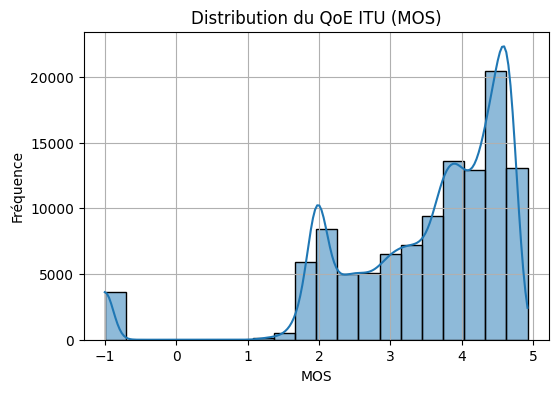

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.histplot(df['QoE_ITU_046'].dropna(), bins=20, kde=True)
plt.title("Distribution du QoE ITU (MOS)")
plt.xlabel("MOS")
plt.ylabel("Fréquence")
plt.grid()
plt.show()


Ce qu’on observe :

- La majorité des valeurs sont entre 3,5 et 5, donc la qualité perçue est globalement bonne.

- Il y a quelques valeurs très basses (vers -1 ou 0) → probablement des erreurs, valeurs manquantes codées bizarrement, ou vidéos très dégradées.

***Corrélation entre débit descendant et MOS***

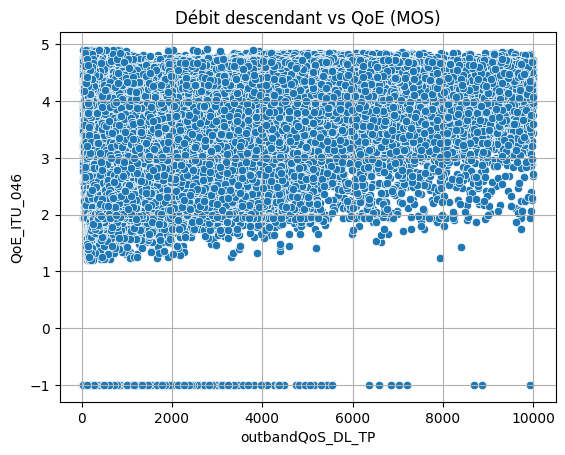

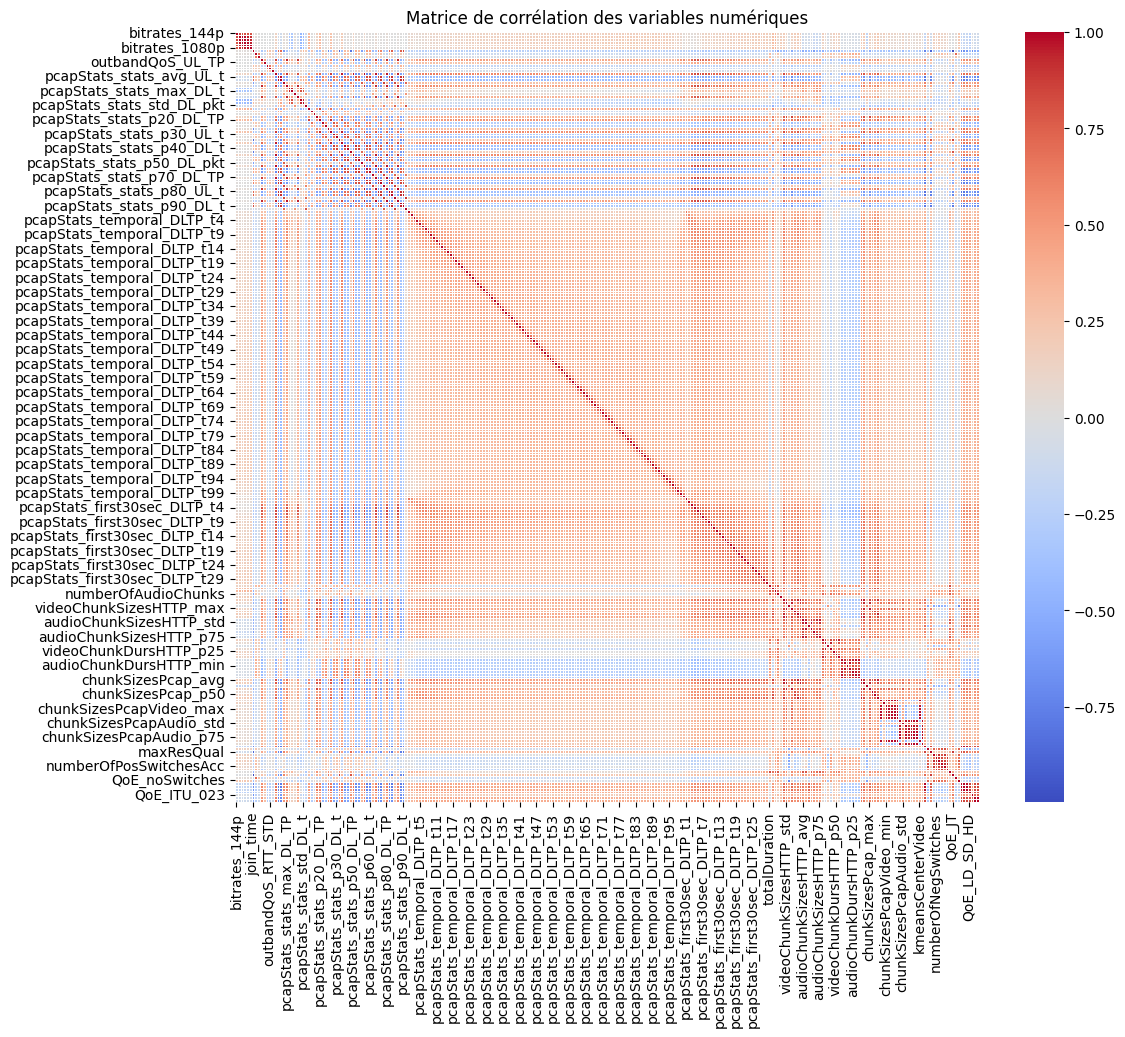

In [12]:
sns.scatterplot(data=df, x='outbandQoS_DL_TP', y='QoE_ITU_046')
plt.title("Débit descendant vs QoE (MOS)")
plt.grid()
plt.show()

# Matrice de corrélation
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Matrice de corrélation des variables numériques")
plt.show()

la comparé entre le débit descendant (outbandQoS_DL_TP) avec la QoE montre que La relation n’est pas linéaire : certains cas ont un bon débit mais une mauvaise QoE. Cela montre que d’autres facteurs jouent.

Plusieurs blocs fortement corrélés (zones rouges foncées) → par exemple les features pcapStats_temporal_DLTP_t* sont redondantes.
Certaines variables sont isolées, donc potentiellement informatives seules.

# **Projet QoE – Séance 2 : Régression linéaire & Validation**

***Sélection de la cible et des features***

In [16]:
# Choisir la variable à prédire
target = "QoE_ITU_046"

# Sélectionner les features numériques uniquement
features = df.select_dtypes(include=["float", "int"]).drop(columns=[target]).columns.tolist()

# Nettoyer les données : retirer les lignes avec NaN
df_model = df[features + [target]].dropna()

X = df_model[features]
y = df_model[target]


***Régression linéaire + Évaluation***

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Séparer en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions et RMSE
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"✅ RMSE sur test : {rmse:.3f}")


✅ RMSE sur test : 0.054


***Interprétation des coefficients***

In [20]:
# Affichage des coefficients du modèle
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

coef_df.head(10)


,Feature,Coefficient
32,pcapStats_stats_p20_DL_t,-1.191529
266,QoE_ITU_035,0.924948
39,pcapStats_stats_p40_UL_t,-0.738246
36,pcapStats_stats_p30_DL_t,-0.565413
31,pcapStats_stats_p20_UL_t,0.477465
48,pcapStats_stats_p60_DL_t,0.411508
258,QoE_JT,-0.400373
16,pcapStats_stats_avg_DL_t,0.290211
262,QoE_Linear2,0.248375
47,pcapStats_stats_p60_UL_t,0.236182


***Validation croisée (5-fold)***

Un coefficient positif signifie : "quand cette feature augmente, le MOS (qualité perçue) a tendance à augmenter".

Un coefficient négatif : "quand cette feature augmente, le MOS a tendance à baisser".

In [21]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Validation croisée avec RMSE
scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
print("✅ RMSE moyen (5-fold CV) :", -np.mean(scores))


✅ RMSE moyen (5-fold CV) : 0.05627506474127092


Le modèle donne une erreur quadratique moyenne très faible : 0.054 sur le jeu de test, et 0.056 en validation croisée.
Cela montre que les features réseau ont un fort pouvoir prédictif sur la QoE, même dans une approche simple.

***Visualisation des vraies vs. prédites***

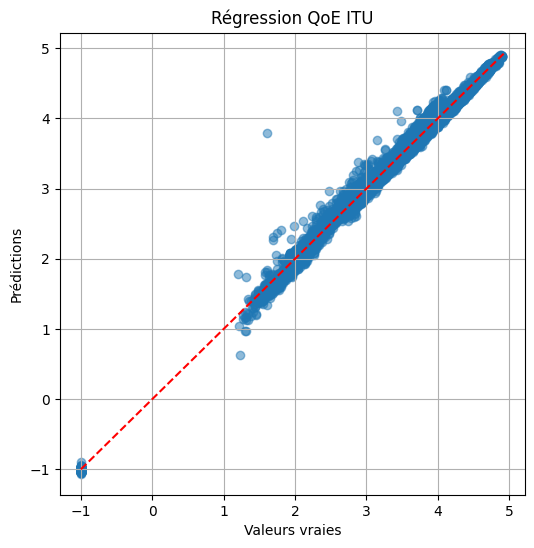

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Valeurs vraies")
plt.ylabel("Prédictions")
plt.title("Régression QoE ITU")
plt.grid()
plt.show()


On voit que les prédictions sont très proches des vraies valeurs.
La ligne rouge est la ligne idéale, et les points sont bien alignés dessus.
Cela confirme les bons résultats chiffrés : RMSE = 0.054.

# **Projet QoE – Séance 3 : Polynomial Regression + Classification**

***Régularisation Ridge : comparaison d'alphas***

***Classification binaire : prédire mauvaise QoE***

# **Projet QoE – Séance 5 : Random Forests and Ensemble Learning**


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Lis les colonnes depuis le fichier .txt
with open("column-names.txt", "r") as f:
    column_names = [line.split('|')[1].strip() for line in f.readlines() if "|" in line and "Field" not in line]

df = pd.read_csv("dataset.csv", header=None, names=column_names)



In [ ]:
target = "QoE_ITU_046"
features = df.select_dtypes(include=["float", "int"]).drop(columns=[target], errors="ignore").columns.tolist()
# On garde les colonnes avec moins de 30% de NaN
valid_features = df[features].isna().mean()[lambda x: x < 0.3].index.tolist()

df_clean = df[valid_features + [target]].dropna()
X = df_clean[valid_features]
y = df_clean[target]

print(f"✅ Données prêtes : {X.shape[0]} lignes, {X.shape[1]} colonnes")


In [ ]:
if X.shape[0] >= 5:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"RMSE (Random Forest): {rmse:.4f}")

    # Importance des variables
    importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
    plt.figure(figsize=(10,5))
    sns.barplot(x=importances.head(10), y=importances.head(10).index)
    plt.title("Top 10 Features importantes (régression)")
    plt.show()
else:
    print(" Pas assez de données pour la régression.")


In [ ]:
df["bad_qoe"] = (df["QoE_ITU_046"] < 3).astype(int)
df_class = df[valid_features + ["bad_qoe"]].dropna()
X_class = df_class[valid_features]
y_class = df_class["bad_qoe"]

if X_class.shape[0] >= 5:
    X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("\n📋 Rapport de classification (Random Forest):")
    print(classification_report(y_test, y_pred))

    importances = pd.Series(clf.feature_importances_, index=X_class.columns).sort_values(ascending=False)
    plt.figure(figsize=(10,5))
    sns.barplot(x=importances.head(10), y=importances.head(10).index)
    plt.title("Top 10 Features importantes (classification)")
    plt.show()
else:
    print("Pas assez de données pour la classification.")
